In [1466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as okt
import os

1. DATA LOADING

In [1467]:
laptop = pd.read_csv('dataset/laptops.csv')

In [1468]:
laptop.head(2)

,laptop_id,name,price,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases
0,0,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HS,161990,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/e/u/f/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjedtcx2vfw.jpeg?q=70,15.6,3.8,5.0,1.0,ASUS,Windows,AMD,Gaming


In [1469]:
laptop.shape #display 796 rows and 16 column

(796, 16)

In [1470]:
laptop.columns #based on these information, we may choose which column that needed

Index(['laptop_id', 'name', 'price', 'processor', 'ram', 'os', 'storage',
       'img_link', 'display', 'rating', 'no_of_ratings', 'no_of_reviews',
       'laptop_brand', 'os_brand', 'processor_brand', 'usecases'],
      dtype='object')

In [1471]:
#laptop.merge(other-df, on = 'column') #use this to merge 2 dataset

2. DATA PREPROCESSING

In [1472]:
#Checking NULL value
laptop.isnull().sum()

laptop_id            0
name                 0
price                0
processor            0
ram                  0
os                   0
storage              0
img_link             0
display              0
rating             266
no_of_ratings      266
no_of_reviews      266
laptop_brand         0
os_brand             0
processor_brand      0
usecases             0
dtype: int64

In [1473]:
laptop.shape

(796, 16)

In [1474]:
laptop.dropna(inplace=True)

In [1475]:
laptop.shape #total instances have been reduced

(530, 16)

In [1476]:
laptop.isnull().sum()

laptop_id          0
name               0
price              0
processor          0
ram                0
os                 0
storage            0
img_link           0
display            0
rating             0
no_of_ratings      0
no_of_reviews      0
laptop_brand       0
os_brand           0
processor_brand    0
usecases           0
dtype: int64

In [1477]:
#Checking duplicate value
laptop.duplicated().sum() #if 0 means no duplicate value

0

3. Data Transformation

In [1478]:
#Price Conversion
laptop['price_rm'] = laptop['price'] * 0.055   #add one more column that price in RM

In [1479]:
laptop[['price', 'price_rm']].head(2)  # Check the original and new price columns

,price,price_rm
0,62990,3464.45
1,161990,8909.45


In [1480]:
laptop.drop(columns=['price'], inplace=True) #To drop column

In [1481]:
new_csv = laptop[['laptop_id','img_link','name','price_rm','laptop_brand','usecases', 'processor','ram', 'os', 'storage']]	

In [1482]:
new_csv.shape #reduced dataset, same as laptops

(530, 10)

In [1483]:
new_csv.rename(columns={'price_rm': 'price', 'laptop_brand': 'brand', 'usecases': 'use'}, inplace=True)

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\3008621298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_csv.rename(columns={'price_rm': 'price', 'laptop_brand': 'brand', 'usecases': 'use'}, inplace=True)


In [1484]:
laptop.head(1)

,laptop_id,name,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases,price_rm
0,0,Lenovo Intel Core i5 11th Gen,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional,3464.45


In [1485]:
laptop['processor'] = laptop['processor'].apply(lambda x:x.split())
laptop['ram'] = laptop['ram'].apply(lambda x:x.split())
laptop['os'] = laptop['os'].apply(lambda x:x.split())
laptop['use'] = laptop['usecases'].apply(lambda x:x.split())

In [1486]:
laptop.head(1)

,laptop_id,name,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases,price_rm,use
0,0,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional,3464.45,[Business/Professional]


In [1487]:
laptop.iloc[0]['processor']

['Intel', 'Core', 'i5', 'Processor', '(11th', 'Gen)']

In [1488]:
laptop.head(2)

,laptop_id,name,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases,price_rm,use
0,0,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional,3464.45,[Business/Professional]
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HS,"[AMD, Ryzen, 9, Octa, Core, Processor]","[16, GB, DDR5, RAM]","[64, bit, Windows, 11, Operating, System]",1 TB SSD,https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/e/u/f/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjedtcx2vfw.jpeg?q=70,15.6,3.8,5.0,1.0,ASUS,Windows,AMD,Gaming,8909.45,[Gaming]


In [1489]:
#Tag column creation
#use concatenate 
laptop['tags'] = laptop['processor']+laptop['ram']+laptop['os']+laptop['use']

In [1490]:
laptop.shape

(530, 18)

In [1491]:
#new = laptop[['laptop_id','img_link','name','price_rm','laptop_brand','use','tags', 'processor','ram', 'os', 'storage']]	

new = laptop[['laptop_id','name','tags', 'img_link', 'price_rm','laptop_brand','usecases', 'processor','ram', 'os', 'storage']] #create a new df and only store 3 specs/attributes

In [1492]:
new.rename(columns={'price_rm': 'price', 'laptop_brand': 'brand', 'usecases': 'use'}, inplace=True)

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\303086359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={'price_rm': 'price', 'laptop_brand': 'brand', 'usecases': 'use'}, inplace=True)


In [1493]:
new.shape

(530, 11)

In [1494]:
new.head(2)

,laptop_id,name,tags,img_link,price,brand,use,processor,ram,os,storage
0,0,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen), 16, GB, DDR4, RAM, Windows, 11, Operating, System, Business/Professional]",https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,3464.45,Lenovo,Business/Professional,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HS,"[AMD, Ryzen, 9, Octa, Core, Processor, 16, GB, DDR5, RAM, 64, bit, Windows, 11, Operating, System, Gaming]",https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/e/u/f/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjedtcx2vfw.jpeg?q=70,8909.45,ASUS,Gaming,"[AMD, Ryzen, 9, Octa, Core, Processor]","[16, GB, DDR5, RAM]","[64, bit, Windows, 11, Operating, System]",1 TB SSD


In [1495]:
new['tags'] = new['tags'].apply(lambda x:" ".join(x)) #convert tags into paragraph format

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\3566823600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tags'] = new['tags'].apply(lambda x:" ".join(x)) #convert tags into paragraph format


In [1496]:
new['tags'] = new['tags'].apply(lambda x:x.lower()) #convert tags into small letter

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\1279253556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tags'] = new['tags'].apply(lambda x:x.lower()) #convert tags into small letter


In [1497]:
new.head(2)

,laptop_id,name,tags,img_link,price,brand,use,processor,ram,os,storage
0,0,Lenovo Intel Core i5 11th Gen,intel core i5 processor (11th gen) 16 gb ddr4 ram windows 11 operating system business/professional,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,3464.45,Lenovo,Business/Professional,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HS,amd ryzen 9 octa core processor 16 gb ddr5 ram 64 bit windows 11 operating system gaming,https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/e/u/f/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjedtcx2vfw.jpeg?q=70,8909.45,ASUS,Gaming,"[AMD, Ryzen, 9, Octa, Core, Processor]","[16, GB, DDR5, RAM]","[64, bit, Windows, 11, Operating, System]",1 TB SSD


4. TF IDF

In [1498]:
#use stem to reduce words in the tags column to their base or root forms. For example, "running" might be reduced to "run."
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [1499]:
def stem(text):
    l=[]
    for i in text.split():
        l.append(ps.stem(i))

    return " ".join(l)

In [1500]:
new['tags'] = new['tags'].apply(stem)

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\1164172309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['tags'] = new['tags'].apply(stem)


In [1501]:
new.iloc[0]['tags']

'intel core i5 processor (11th gen) 16 gb ddr4 ram window 11 oper system business/profession'

In [1502]:
#use vectorizer to vectorise the tags
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

#max feature means can consider 5000 frequent word
#stop word will remove word 'in', 'the, etc, word that dont have meaning

In [1503]:
vector = cv.fit_transform(new['tags']).toarray()

In [1504]:
vector

array([[0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1]], dtype=int64)

In [1505]:
vector.shape

(530, 77)

5. COSINE SIMILARITY

In [1506]:
from sklearn.metrics.pairwise import cosine_similarity

In [1507]:
similarity = cosine_similarity(vector)

In [1508]:
similarity #similarity = distance

array([[1.        , 0.53333333, 0.62622429, ..., 0.6       , 0.59628479,
        0.83914639],
       [0.53333333, 1.        , 0.56360186, ..., 0.6       , 0.74535599,
        0.5809475 ],
       [0.62622429, 0.56360186, 1.        , ..., 0.68884672, 0.56011203,
        0.78824078],
       ...,
       [0.6       , 0.6       , 0.68884672, ..., 1.        , 0.59628479,
        0.71004695],
       [0.59628479, 0.74535599, 0.56011203, ..., 0.59628479, 1.        ,
        0.57735027],
       [0.83914639, 0.5809475 , 0.78824078, ..., 0.71004695, 0.57735027,
        1.        ]])

In [1509]:
similarity.shape 

(530, 530)

In [1510]:
new.shape

(530, 11)

In [1511]:
similarity[0]

array([1.        , 0.53333333, 0.62622429, 0.46709937, 0.38924947,
       0.6       , 0.68884672, 0.96609178, 0.51639778, 0.87671401,
       0.83914639, 0.93333333, 0.89708523, 0.62622429, 0.68884672,
       0.71004695, 0.66666667, 0.68884672, 0.38924947, 0.62622429,
       0.90369611, 0.66666667, 0.68884672, 0.82807867, 0.53333333,
       0.83914639, 0.66666667, 0.53333333, 0.83914639, 1.        ,
       0.53333333, 0.5809475 , 0.83914639, 0.83914639, 0.50128041,
       0.66666667, 0.77459667, 0.90369611, 0.62622429, 0.64549722,
       0.87671401, 0.83914639, 0.55205245, 0.68884672, 0.53333333,
       0.87671401, 0.68884672, 0.90369611, 0.6       , 0.55205245,
       0.77459667, 0.89708523, 0.55205245, 0.38924947, 0.93933644,
       0.55205245, 0.82807867, 0.83914639, 0.4472136 , 0.4472136 ,
       0.77459667, 0.5809475 , 0.71004695, 0.48304589, 0.87671401,
       0.53333333, 0.51639778, 0.77459667, 0.83914639, 0.83914639,
       0.71611487, 0.96609178, 0.51639778, 0.83914639, 0.77459

In [1512]:
sorted(list(enumerate(similarity[1])), reverse=True, key= lambda x: x[1]) #distance between item to all items

[(1, 0.9999999999999998),
 (30, 0.9999999999999998),
 (260, 0.9999999999999998),
 (282, 0.9999999999999998),
 (420, 0.9999999999999998),
 (75, 0.9333333333333331),
 (81, 0.9333333333333331),
 (86, 0.9333333333333331),
 (145, 0.9333333333333331),
 (186, 0.9333333333333331),
 (194, 0.9333333333333331),
 (201, 0.9333333333333331),
 (247, 0.9333333333333331),
 (300, 0.9333333333333331),
 (369, 0.9333333333333331),
 (394, 0.9333333333333331),
 (516, 0.9333333333333331),
 (518, 0.9333333333333331),
 (476, 0.9309493362512627),
 (139, 0.9036961141150636),
 (49, 0.8970852271450606),
 (88, 0.8970852271450606),
 (143, 0.8970852271450606),
 (223, 0.8970852271450606),
 (184, 0.8767140075192089),
 (100, 0.8666666666666665),
 (204, 0.8666666666666665),
 (212, 0.8666666666666665),
 (320, 0.8666666666666665),
 (338, 0.8666666666666665),
 (445, 0.8666666666666665),
 (352, 0.8593378488473195),
 (31, 0.8391463916782733),
 (87, 0.8391463916782733),
 (115, 0.8391463916782733),
 (275, 0.8391463916782733),
 (

6. TESTING

In [1513]:
new[new['name'] == 'MSI GF63 Thin Core i7 9th Gen'] #we get the index for the specific laptop

,laptop_id,name,tags,img_link,price,brand,use,processor,ram,os,storage
724,724,MSI GF63 Thin Core i7 9th Gen,intel core i7 processor (9th gen) 8 gb ddr4 ram 64 bit window 10 oper system game,https://rukminim1.flixcart.com/image/312/312/kb1470w0/computer/z/5/f/msi-na-gaming-laptop-original-imafsh7ahbgkmvtm.jpeg?q=70,3684.45,MSI,Gaming,"[Intel, Core, i7, Processor, (9th, Gen)]","[8, GB, DDR4, RAM]","[64, bit, Windows, 10, Operating, System]",512 GB SSD


In [1514]:
new[new['name'] == 'MSI GF63 Thin Core i7 9th Gen'].index[0] #we get the index for the specific laptop

724

In [1515]:
new.head(4)

,laptop_id,name,tags,img_link,price,brand,use,processor,ram,os,storage
0,0,Lenovo Intel Core i5 11th Gen,intel core i5 processor (11th gen) 16 gb ddr4 ram window 11 oper system business/profession,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,3464.45,Lenovo,Business/Professional,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD
1,1,ASUS ROG Zephyrus G15 (2022) with 90Whr Battery Ryzen 9 Octa Core 6900HS,amd ryzen 9 octa core processor 16 gb ddr5 ram 64 bit window 11 oper system game,https://rukminim1.flixcart.com/image/312/312/l58iaa80/computer/e/u/f/ga503rm-hq030ws-gaming-laptop-asus-original-imagfyjedtcx2vfw.jpeg?q=70,8909.45,ASUS,Gaming,"[AMD, Ryzen, 9, Octa, Core, Processor]","[16, GB, DDR5, RAM]","[64, bit, Windows, 11, Operating, System]",1 TB SSD
2,2,ASUS VivoBook 15 (2022) Core i3 10th Gen,intel core i3 processor (10th gen) 8 gb ddr4 ram 64 bit window 11 oper system home/everyday use,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/e/1/7/-original-imag3ebnzawky4kn.jpeg?q=70,1869.45,ASUS,Home/Everyday use,"[Intel, Core, i3, Processor, (10th, Gen)]","[8, GB, DDR4, RAM]","[64, bit, Windows, 11, Operating, System]",512 GB SSD
3,3,Lenovo Athlon Dual Core,amd athlon dual core processor 4 gb ddr4 ram do oper system budget friendli,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/g/w/y/-original-imagmuhrzbmzwnee.jpeg?q=70,1044.45,Lenovo,Budget Friendly,"[AMD, Athlon, Dual, Core, Processor]","[4, GB, DDR4, RAM]","[DOS, Operating, System]",256 GB SSD


In [1516]:
''' From github
def recommend(use):
    index = new[new['name'] == use].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    printed_names = set()
    #display top 5
    for i in distances[1:6]: #iterates 1 to 5, excluding 6
        row_index = i[0]
        name = new.iloc[row_index]['name']
        if name not in printed_names:
            printed_names.add(name)
            print(name)
'''

" From github\ndef recommend(use):\n    index = new[new['name'] == use].index[0]\n    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])\n    printed_names = set()\n    #display top 5\n    for i in distances[1:6]: #iterates 1 to 5, excluding 6\n        row_index = i[0]\n        name = new.iloc[row_index]['name']\n        if name not in printed_names:\n            printed_names.add(name)\n            print(name)\n"

In [1517]:
#create Recommend Function 1 (CHOOSE THIS FOR STREAMLIT)
'''
def recommend(x):
    index = new[new['name'] == x].index[0]  # Find the index of the input laptop
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key= lambda x: x[1])  # Sort the similarities
    print(f"Laptops similar to '{x}':")
    for i in distance[1:6]:
        laptop = new.iloc[i[0]]  #get the laptop information
        similarity_score = i[1]  #get the similarity score
        print(f"{laptop['name']} | Similarity Score: {similarity_score:.2f} | Image Link: {laptop['img_link']}")
'''

'\ndef recommend(x):\n    index = new[new[\'name\'] == x].index[0]  # Find the index of the input laptop\n    distance = sorted(list(enumerate(similarity[index])), reverse=True, key= lambda x: x[1])  # Sort the similarities\n    print(f"Laptops similar to \'{x}\':")\n    for i in distance[1:6]:\n        laptop = new.iloc[i[0]]  #get the laptop information\n        similarity_score = i[1]  #get the similarity score\n        print(f"{laptop[\'name\']} | Similarity Score: {similarity_score:.2f} | Image Link: {laptop[\'img_link\']}")\n'

In [1518]:
#Recommend Function 2
new.reset_index(drop=True, inplace=True) # Reset the index to align with the similarity matrix
def recommend(x):
    # Check if the input exists in the database
    if x not in new['name'].values:
        print(f"Laptop '{x}' is not found in the database.")
        return

    # Get the index of the laptop model of the input
    index = new[new['name'] == x].index[0]

    # Ensure the index is within bounds
    if index >= len(similarity):
        print("Error: The index is out of bounds for the similarity matrix.")
        return

    # Sort laptops by similarity, retrieving similarity scores
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])

    printed_names = set()
    print(f"Laptops similar to '{x}':")

    # Display recommendations
    for i in distances[1:]:
        name = new.iloc[i[0]]['name']
        similarity_score = i[1]

        # Check to ensure that the input is excluded as recommendations
        if name != x and name not in printed_names:
            printed_names.add(name)
            print(f"{name} (Similarity Score: {similarity_score:.2f})")
        if len(printed_names) == 5:
            break


In [1519]:
print(similarity.shape)  # Check the shape of the similarity matrix

(530, 530)


In [1520]:
print(new.shape) 

(530, 11)


In [1521]:
print(len(new)) 

530


In [1542]:
recommend('Infinix X1 Slim Series Core i3 10th Gen')

Laptops similar to 'Infinix X1 Slim Series Core i3 10th Gen':
Infinix X1 Slim Series Core i5 10th Gen (Similarity Score: 0.94)
DELL Vostro Core i3 10th Gen (Similarity Score: 0.94)
DELL Core i3 10th Gen (Similarity Score: 0.94)
ASUS Vivobook 15 Core i3 11th Gen (Similarity Score: 0.88)
Lenovo Intel Core i3 11th Gen (Similarity Score: 0.88)


In [1525]:
laptop[laptop['name'] == 'Lenovo Intel Core i5 11th Gen']

,laptop_id,name,processor,ram,os,storage,img_link,display,rating,no_of_ratings,no_of_reviews,laptop_brand,os_brand,processor_brand,usecases,price_rm,use,tags
0,0,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional,3464.45,[Business/Professional],"[Intel, Core, i5, Processor, (11th, Gen), 16, GB, DDR4, RAM, Windows, 11, Operating, System, Business/Professional]"
29,29,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/1/b/0/15itl6-thin-and-light-laptop-lenovo-original-imagkwgzafjp33es.jpeg?q=70,15.6,4.5,14.0,1.0,Lenovo,Windows,Intel,Business/Professional,2908.95,[Business/Professional],"[Intel, Core, i5, Processor, (11th, Gen), 16, GB, DDR4, RAM, Windows, 11, Operating, System, Business/Professional]"
182,182,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[8, GB, DDR4, RAM]","[64, bit, Windows, 11, Operating, System]",1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/kynb6vk0/computer/k/j/a/-original-imagaufne7h4hgbz.jpeg?q=70,15.6,4.4,395.0,43.0,Lenovo,Windows,Intel,Student/Education,3574.45,[Student/Education],"[Intel, Core, i5, Processor, (11th, Gen), 8, GB, DDR4, RAM, 64, bit, Windows, 11, Operating, System, Student/Education]"
697,697,Lenovo Intel Core i5 11th Gen,"[Intel, Core, i5, Processor, (11th, Gen)]","[16, GB, DDR4, RAM]","[Windows, 11, Operating, System]",512 GB SSD,https://rukminim1.flixcart.com/image/312/312/xif0q/computer/f/i/m/15ihu6-gaming-laptop-lenovo-original-imagkwgwgbxysnr2.jpeg?q=70,15.6,4.1,8.0,0.0,Lenovo,Windows,Intel,Business/Professional,3755.95,[Business/Professional],"[Intel, Core, i5, Processor, (11th, Gen), 16, GB, DDR4, RAM, Windows, 11, Operating, System, Business/Professional]"


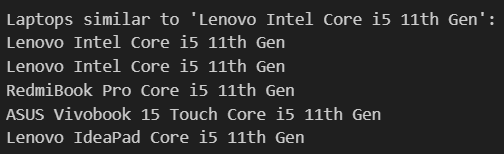 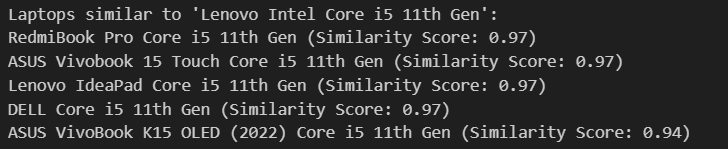

In [1526]:
new['ram'] = new_csv['ram']
new['processor'] = new_csv['processor']
new['os'] = new_csv['os']

C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\577124195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['ram'] = new_csv['ram']
C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\577124195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['processor'] = new_csv['processor']
C:\Users\aiman\AppData\Local\Temp\ipykernel_21680\577124195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [1532]:
import pickle

pickle.dump(new, open('model/laptop_list.pkl', 'wb'))
pickle.dump(similarity, open('model/similarity.pkl', 'wb'))
new_csv.to_csv('model/update_laptop.csv', sep=',', index=False, encoding='utf-8')